# 3QEUS0 - Sociophysics 1
## A gentle intro to working with train arrival data

### Contacts:
*   A.Corbetta - a.corbetta@tue.nl
*   C.Pouw     - c.a.s.pouw@tue.nl
*   A.Gabbana  - a.gabbana@tue.nl  

#### First, we need to install the API for accessing the data
Note: If you work in colab you need to perform the installation everytime you start the notebook; if you work offline (jupyter notebook/lab) you need to do this just once

In [2]:
!pip install -q sociophysicsDataHandler

In [5]:
!pip install sociophysicsDataHandler --upgrade

  Using cached sociophysicsDataHandler-1.4.tar.gz (7.2 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for sociophysicsDataHandler: filename=sociophysicsDataHandler-1.4-py3-none-any.whl size=7745 sha256=47ac1252f0fdaa59cf1321f3a5c7b1b4220d86adb9f1912d632d11c7165e6b93
  Stored in directory: /home/pouw/.cache/pip/wheels/71/ab/2b/df8a88b206d4e5975df96f4b97ade34405c325bbb29ddcb16f
Successfully built sociophysicsDataHandler
  Attempting uninstall: sociophysicsDataHandler
    Found existing installation: sociophysicsDataHandler 1.3.2
    Uninstalling sociophysicsDataHandler-1.3.2:
      Successfully uninstalled sociophysicsDataHandler-1.3.2


In [1]:
import pandas as pd
from sociophysicsDataHandler import SociophysicsDataHandler
dh = SociophysicsDataHandler()

We can read the train information in Eindhoven with the datahandler. Note that we only provide the traininformation in Eindhoven.

In [3]:
dh.fetch_prorail_train_information()
trains = dh.train_information
trains.head()

trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/ehv_train_information_pss.parquet
data fetched. Accessible as <this-object>.train_information


,date,station,train_number,arrival_time,departure_time,door_no,door_x,door_y
0,2021-01-01,Ehv,832,2021-01-01 10:02:02+01:00,2021-01-01 10:06:04+01:00,NaN,NaN,NaN
1,2021-01-01,Ehv,834,2021-01-01 10:31:37+01:00,2021-01-01 10:36:03+01:00,NaN,NaN,NaN
2,2021-01-01,Ehv,836,2021-01-01 11:04:20+01:00,2021-01-01 11:07:49+01:00,NaN,NaN,NaN
3,2021-01-01,Ehv,838,2021-01-01 11:32:09+01:00,2021-01-01 11:36:02+01:00,NaN,NaN,NaN
4,2021-01-01,Ehv,840,2021-01-01 12:02:02+01:00,2021-01-01 12:05:50+01:00,NaN,NaN,NaN


From 2022-01-01 to 2023-07-26 we localized the traindoors. Be carefull, these locations are infered from the pedestrian trajectories and are not always accurate.

### Select one of the trains

In [4]:
train_number = 300827 # Select a train number
date = pd.datetime(2023, 7, 26).date() # Select a date
train = trains[(trains['train_number'] == train_number) & (trains['date'] == date)]
arrival_time = train.arrival_time.iloc[0]
departure_time = train.departure_time.iloc[0]
hour_of_arrival = arrival_time.hour
train.head()

/tmp/ipykernel_1629654/4009967894.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  date = pd.datetime(2023, 7, 26).date() # Select a date


,date,station,train_number,arrival_time,departure_time,door_no,door_x,door_y
275949,2023-07-26,Ehv,300827,2023-07-26 09:28:42+02:00,2023-07-26 09:32:04+02:00,1.0,13975.790848,-8721.148532
275950,2023-07-26,Ehv,300827,2023-07-26 09:28:42+02:00,2023-07-26 09:32:04+02:00,2.0,21065.152225,-8816.307746
275951,2023-07-26,Ehv,300827,2023-07-26 09:28:42+02:00,2023-07-26 09:32:04+02:00,3.0,40953.360656,-9083.263563
275952,2023-07-26,Ehv,300827,2023-07-26 09:28:42+02:00,2023-07-26 09:32:04+02:00,4.0,49272.611241,-9194.931356
275953,2023-07-26,Ehv,300827,2023-07-26 09:28:42+02:00,2023-07-26 09:32:04+02:00,5.0,68270.899838,-9449.941942


### Read background and configuration parameters

In [5]:
configuration = dh.fetch_configuration_data(station = 'ehv', platform_number = '2.1', date = '2023-01-01')
dh.fetch_background_image_from_path(configuration['plattegrond'])

trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/configuration
trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/background_images/EHV.Perron2.1_multisensor.png
background fetched. Accessible as <this-object>.bg


### Read trajectory data connected to the train you picked.

In [6]:
folder_path = f'ehv/platform2.1/{date.year:04}{date.month:02}{date.day:02}/'
file_target = f"EHV_Platform2.1_{date.year:04}{date.month:02}{date.day:02}{hour_of_arrival:02}_trajectorie.parquet"
file_path = folder_path + file_target
dh.fetch_prorail_data_from_path(file_path) # Read the data
dh.df.head() # Display first 5 rows
# Swap the x and y coordinates
dh.df.rename({'x_pos':'y_pos', 'y_pos':'x_pos'}, axis = 1, inplace = True)
trajs_during_train = dh.df[(dh.df['datetime'] >= arrival_time) & (dh.df['datetime'] <= departure_time)]

trying to fetch: /storage/surfsara/ProRail_USE_LL_data/ehv/platform2.1/20230726/EHV_Platform2.1_2023072609_trajectorie.parquet
data fetched. Accessible as <this-object>.df


### Plot trajectories and train doors

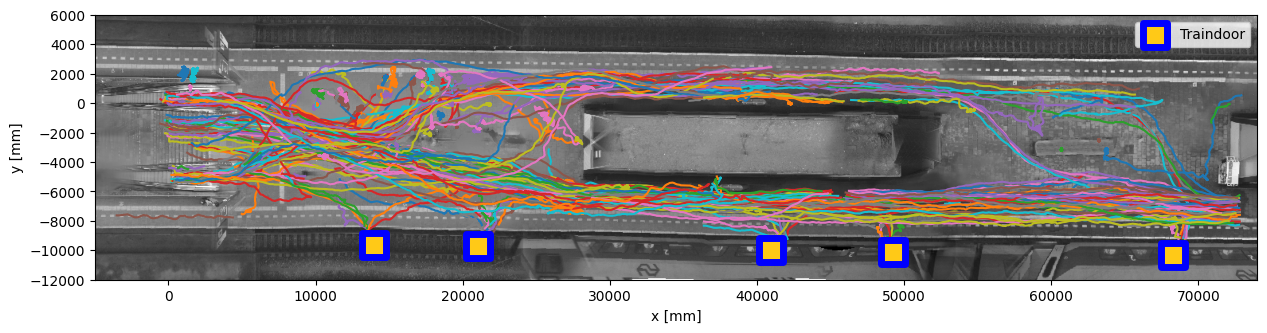

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (15, 5))

# Plot the individual trajectories
trajs_during_train.groupby('tracked_object').apply(lambda x : ax.plot(x.x_pos,x.y_pos));

# Plot the background image
bg_params = configuration["background_parameters"][next(iter(configuration['background_parameters']))]
plt.gca().imshow(dh.bg, extent = [
                    bg_params["x_min"],bg_params["x_max"],
                    bg_params["y_min"],bg_params["y_max"],
                ], alpha = 1)

# Set the axis
ax.set_aspect('equal')
plt.xlim(-5000, 74000)
plt.ylim(-12000, 6000)

# Set axis labels
plt.xlabel('x [mm]')
plt.ylabel('y [mm]')

plt.scatter(train.door_x, train.door_y-900, marker = 's', fc = '#FFC917', ec = 'b', s = 300, zorder = 10, lw = 5, label = 'Traindoor')
plt.legend()